In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"klyushnik","key":"0383b36da64c3f3356fff0affef42621"}'}

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c house-prices-advanced-regression-techniques

  0% 0.00/199k [00:00<?, ?B/s]
100% 199k/199k [00:00<00:00, 58.5MB/s]


In [ ]:
! unzip house-prices-advanced-regression-techniques.zip

Archive:  house-prices-advanced-regression-techniques.zip
  inflating: data_description.txt    
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost.sklearn import XGBRegressor
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [ ]:
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')

In [ ]:
train.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [ ]:
test.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
5,1466,60,RL,75.0,10000,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
6,1467,20,RL,NaN,7980,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,GdPrv,Shed,500,3,2010,WD,Normal
7,1468,60,RL,63.0,8402,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
8,1469,20,RL,85.0,10176,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2010,WD,Normal
9,1470,20,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,4,2010,WD,Normal


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [ ]:
train.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [ ]:
test.fillna(0, inplace= True)

In [ ]:
train.fillna(0, inplace= True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


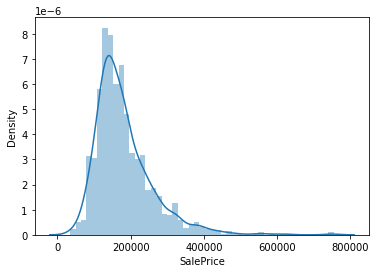

In [ ]:
sns.distplot(train["SalePrice"])

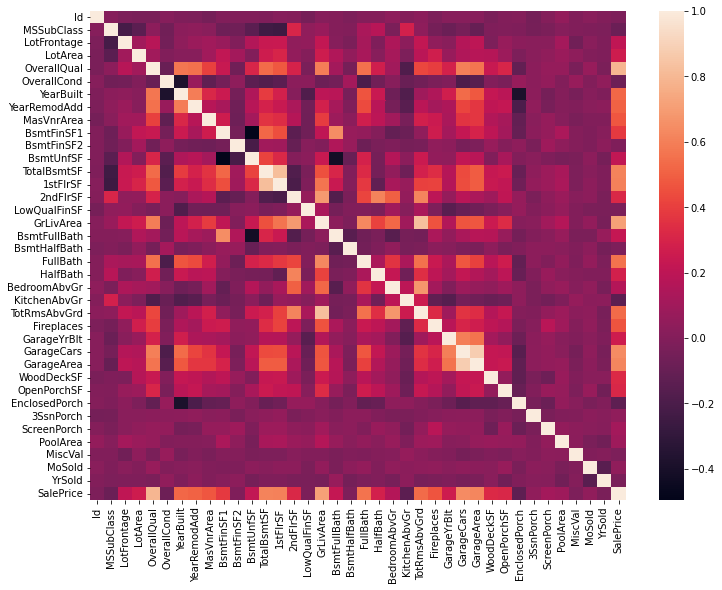

In [ ]:
ctrain_df=train.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(ctrain_df)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


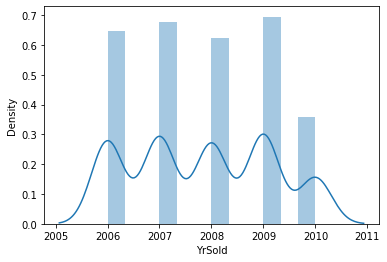

In [ ]:
sns.distplot(train["YrSold"])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


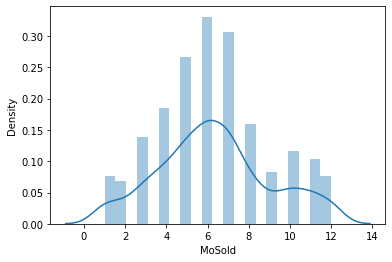

In [ ]:
sns.distplot(train["MoSold"])

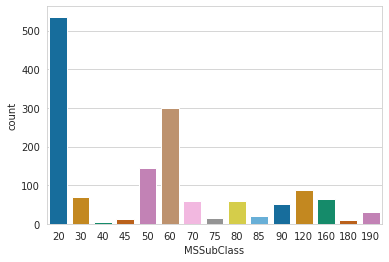

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='MSSubClass',data=train,palette='colorblind')
plt.xlabel("MSSubClass")
plt.ylabel("count")
plt.show() 

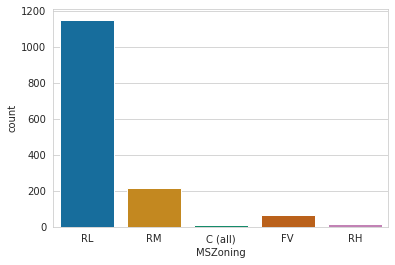

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='MSZoning',data=train,palette='colorblind')
plt.xlabel("MSZoning")
plt.ylabel("count")
plt.show() 

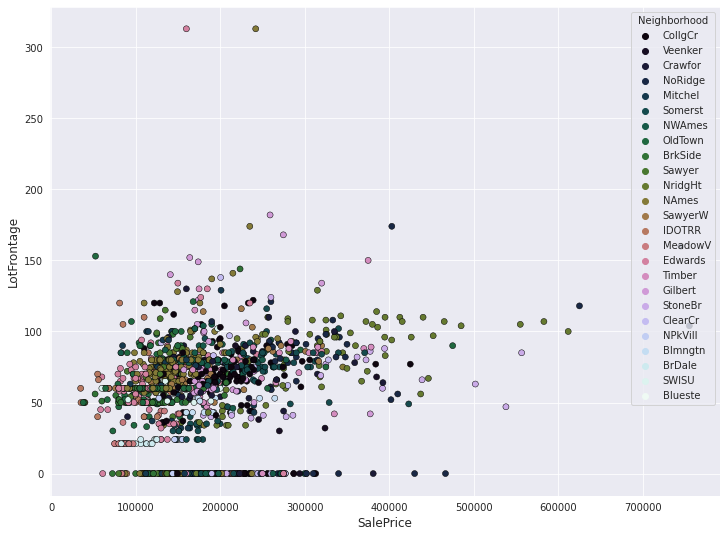

In [ ]:
sns.set_style('darkgrid')
plt.subplots(figsize=(12,9))
plt.title('',size=18)
plt.xlabel('SalePrice',size=12)
plt.ylabel('LotFrontage',size=12)
sns.scatterplot(x='SalePrice', y='LotFrontage', data=train, hue='Neighborhood', edgecolor='black', palette='cubehelix')
plt.show()

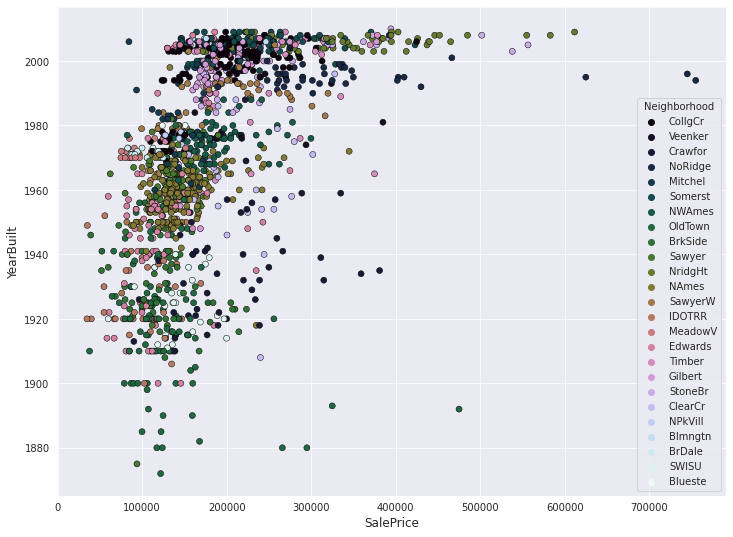

In [ ]:
sns.set_style('darkgrid')
plt.subplots(figsize=(12,9))
plt.title('',size=18)
plt.xlabel('SalePrice',size=12)
plt.ylabel('YearBuilt',size=12)
sns.scatterplot(x='SalePrice', y='YearBuilt', data=train, hue='Neighborhood', edgecolor='black', palette='cubehelix')
plt.show()

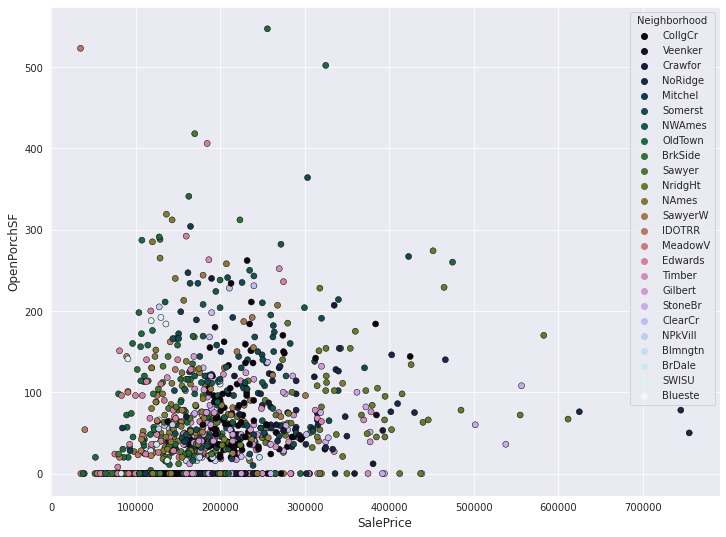

In [ ]:
sns.set_style('darkgrid')
plt.subplots(figsize=(12,9))
plt.title('',size=18)
plt.xlabel('SalePrice',size=12)
plt.ylabel('OpenPorchSF',size=12)
sns.scatterplot(x='SalePrice', y='OpenPorchSF', data=train, hue='Neighborhood', edgecolor='black', palette='cubehelix')
plt.show()

In [ ]:
train.drop(["Id"], axis=1, inplace=True)


Id_test_list = test["Id"].tolist()
test.drop(["Id"], axis=1, inplace=True)

In [ ]:
df_train_num = train.select_dtypes(exclude=["object"])
df_train_num.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


In [ ]:
df_train_num = train.select_dtypes(include=[np.number])
df_train_num.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


In [ ]:
df_train_num = train.select_dtypes(include=[np.number])
df_train_num.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


In [ ]:
df_test_num = test.select_dtypes(include=[np.number])
df_test_num.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,...,730.0,140,0,0,0,120,0,0,6,2010
1,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,...,312.0,393,36,0,0,0,0,12500,6,2010
2,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,...,482.0,212,34,0,0,0,0,0,3,2010
3,60,78.0,9978,6,6,1998,1998,20.0,602.0,0.0,...,470.0,360,36,0,0,0,0,0,6,2010
4,120,43.0,5005,8,5,1992,1992,0.0,263.0,0.0,...,506.0,0,82,0,0,144,0,0,1,2010


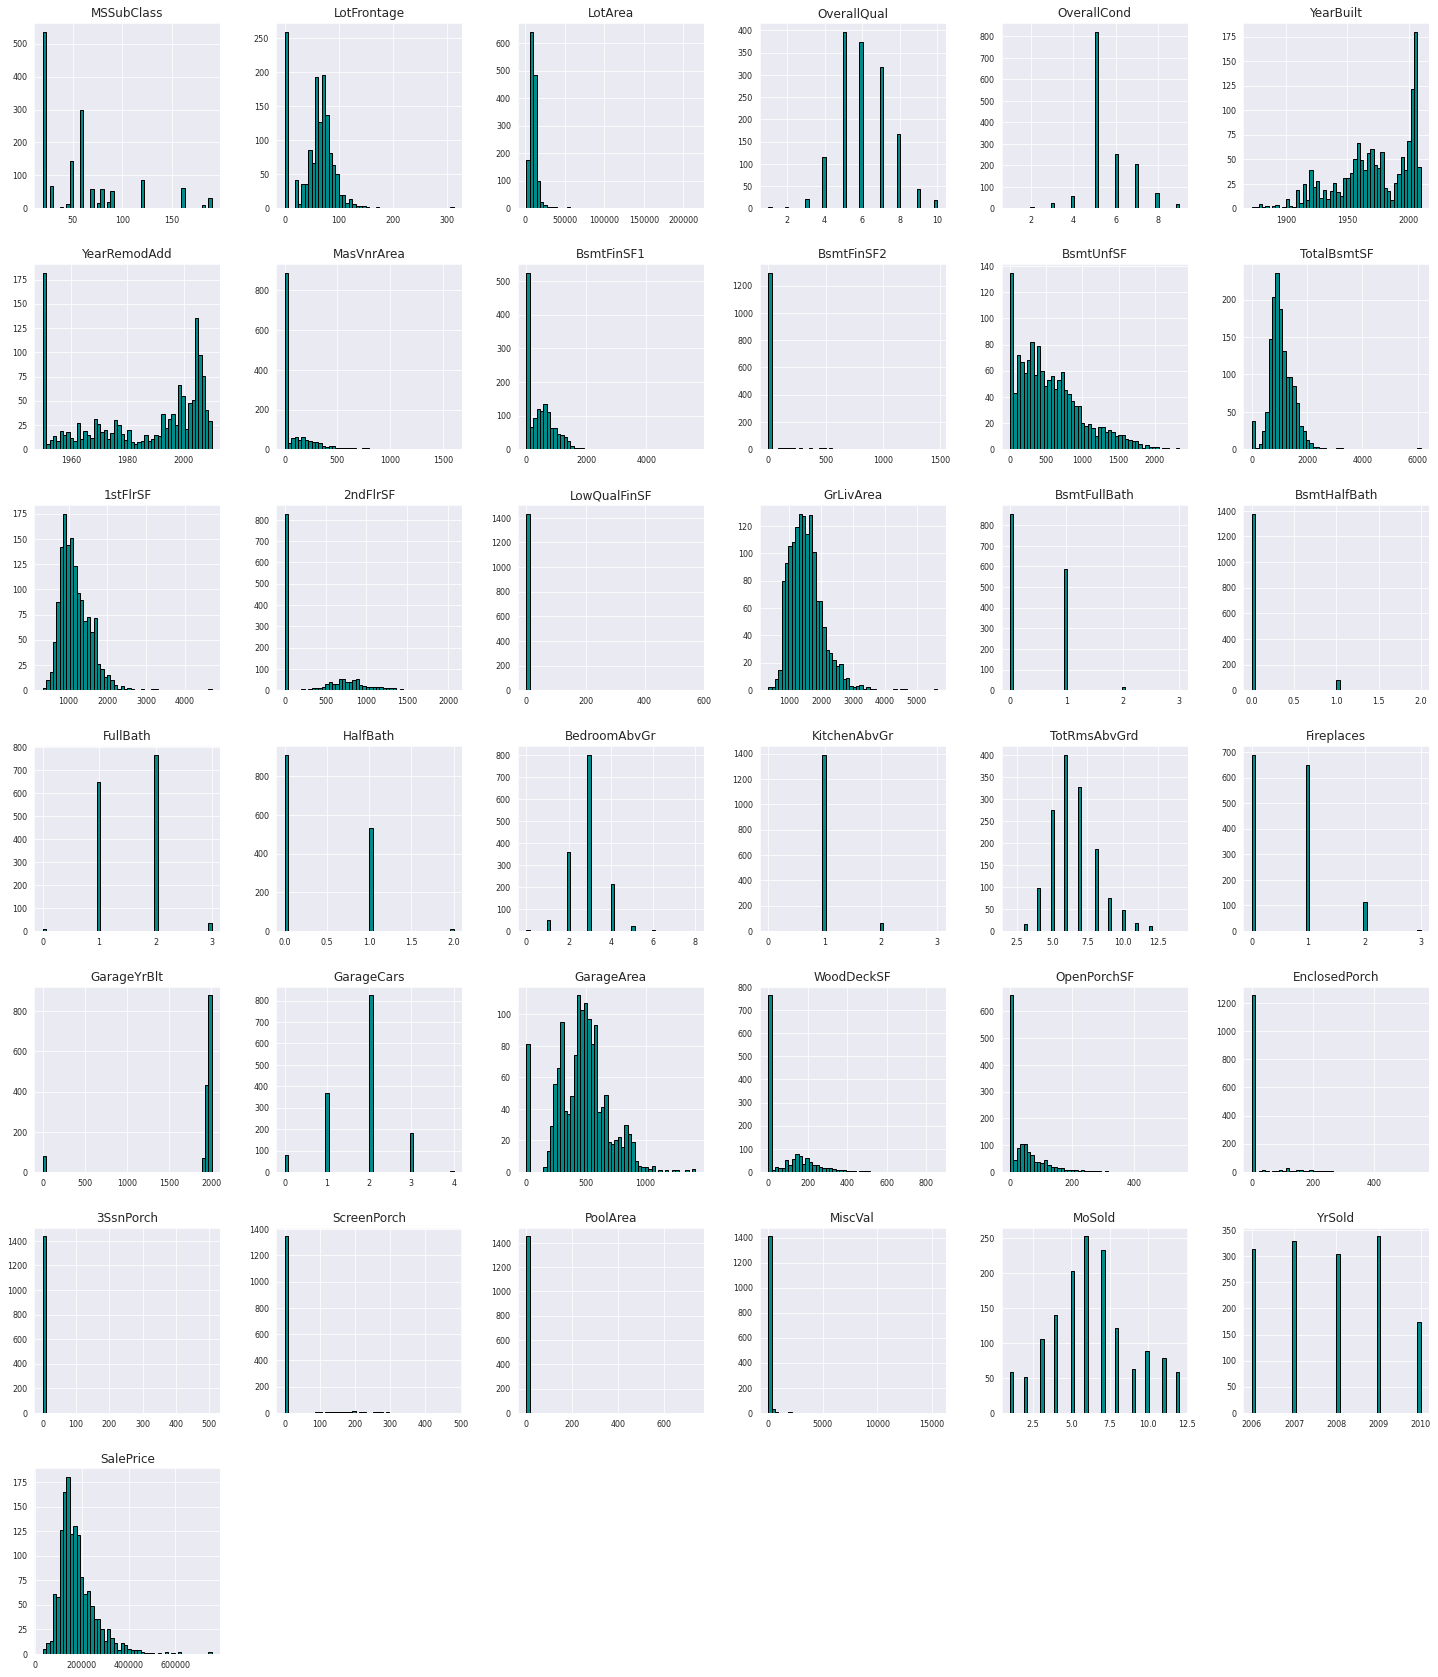

In [ ]:
fig_ = df_train_num.hist(figsize=(25, 30), bins=50, color="darkcyan", edgecolor="black", xlabelsize=8, ylabelsize=8)

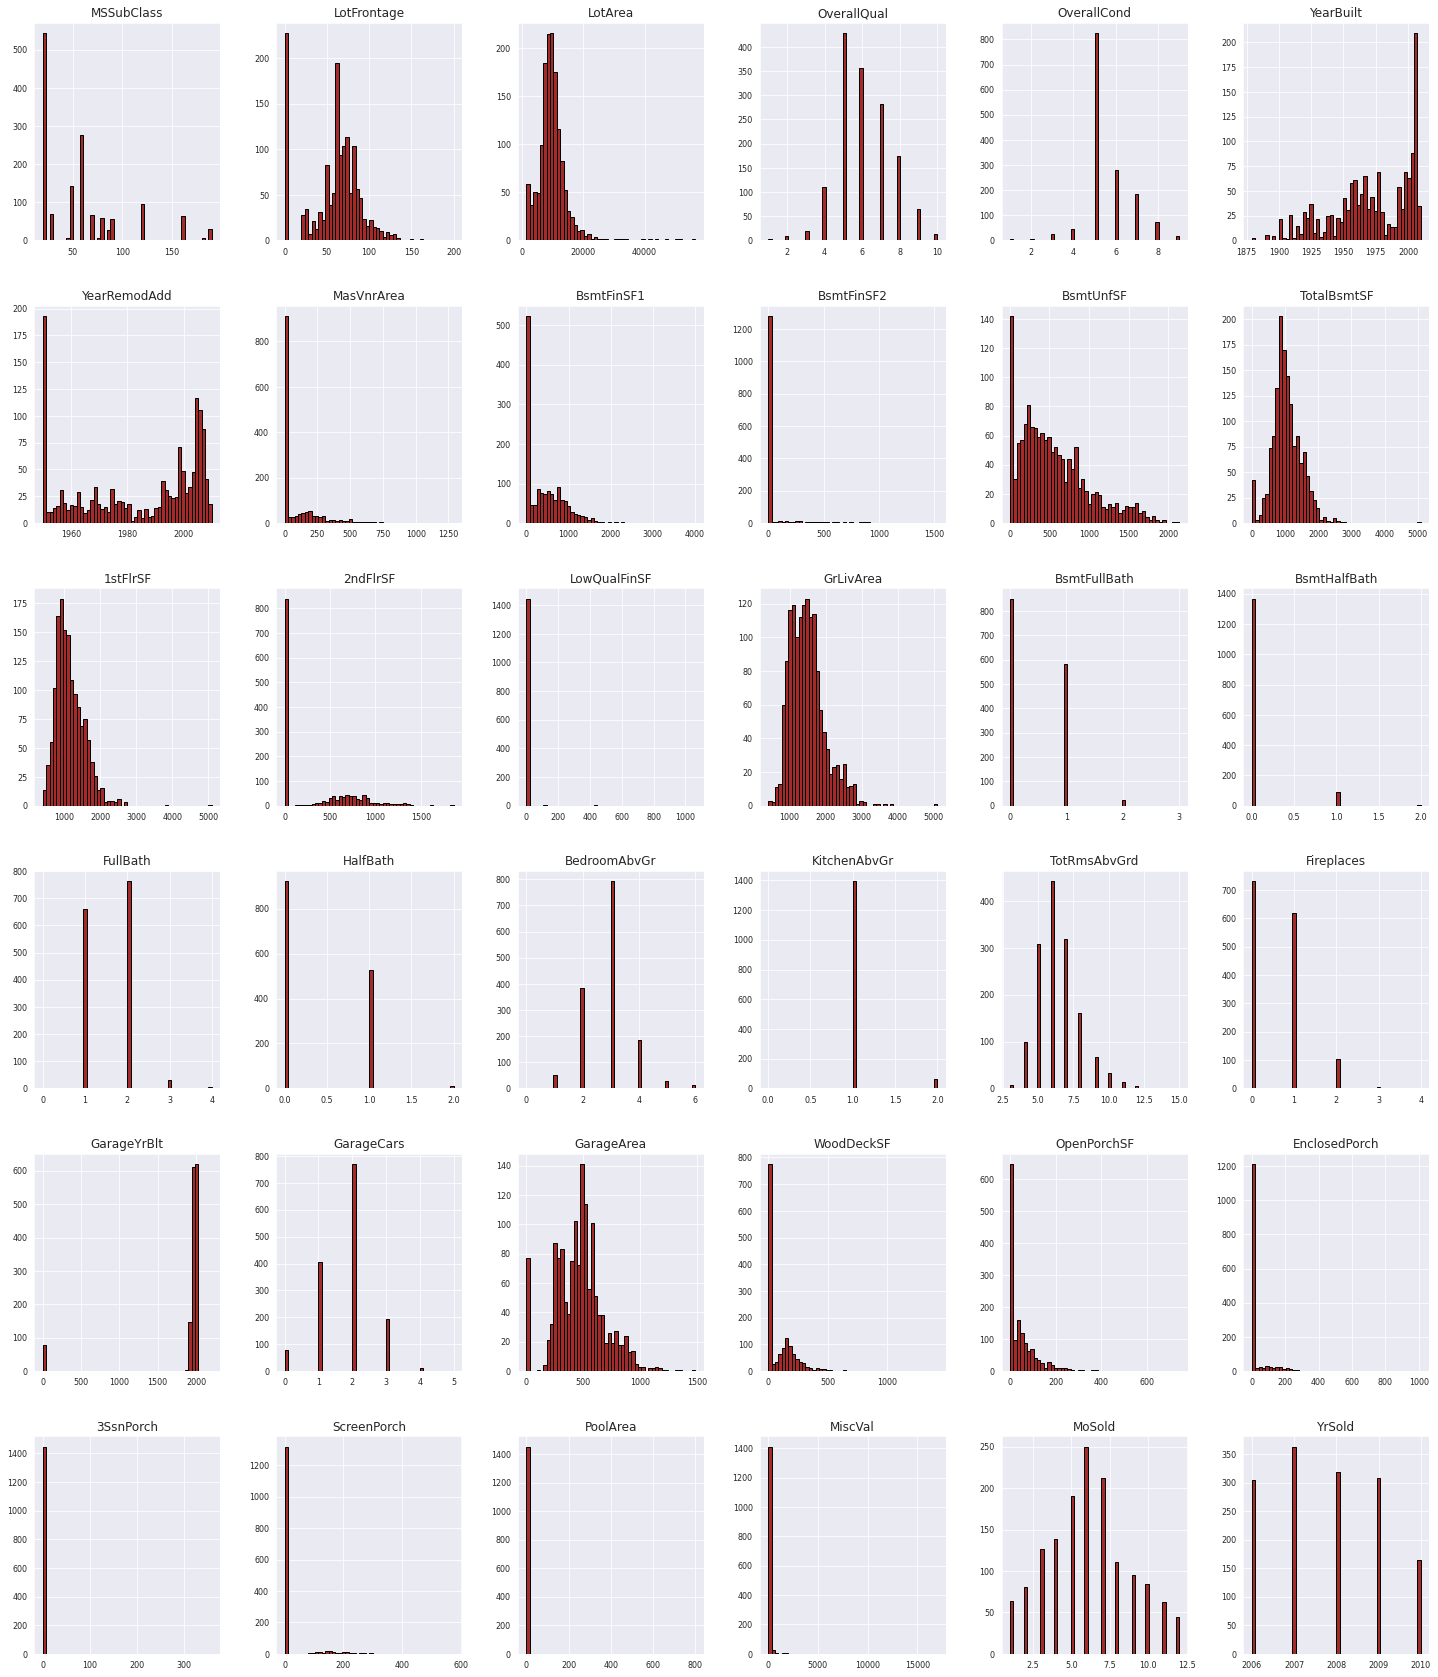

In [ ]:
fig_ = df_test_num.hist(figsize=(25, 30), bins=50, color="brown", edgecolor="black", xlabelsize=8, ylabelsize=8)

In [ ]:
# Displaying a specific colunm
df_train_num[:]['EnclosedPorch']

0         0
1         0
2         0
3       272
4         0
       ... 
1455      0
1456      0
1457      0
1458    112
1459      0
Name: EnclosedPorch, Length: 1460, dtype: int64

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import VarianceThreshold

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
sel = VarianceThreshold(threshold=0.05) # 0.05: drop column where 95% of the values are constant

# fit finds the features with constant variance
sel.fit(df_train_num.iloc[:, :-1])


# Get the number of features that are not constant
print(f"Number of retained features: {sum(sel.get_support())}")

print(f"\nNumber of quasi_constant features: {len(df_train_num.iloc[:, :-1].columns) - sum(sel.get_support())}")

quasi_constant_features_list = [x for x in df_train_num.iloc[:, :-1].columns if x not in df_train_num.iloc[:, :-1].columns[sel.get_support()]]

print(f"\nQuasi-constant features to be dropped: {quasi_constant_features_list}")

# Let's drop these columns from df_train_num
df_train_num.drop(quasi_constant_features_list, axis=1, inplace=True)

Number of retained features: 35

Number of quasi_constant features: 1

Quasi-constant features to be dropped: ['KitchenAbvGr']


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
print(df_train_num.shape)

(1460, 36)


In [ ]:
sel = VarianceThreshold(threshold=0.05) # 0.05: drop column where 95% of the values are constant

# fit finds the features with constant variance
sel.fit(df_test_num.iloc[:, :-1])


# Get the number of features that are not constant
print(f"Number of retained features: {sum(sel.get_support())}")

print(f"\nNumber of quasi_constant features: {len(df_test_num.iloc[:, :-1].columns) - sum(sel.get_support())}")

quasi_constant_features_list = [x for x in df_test_num.iloc[:, :-1].columns if x not in df_test_num.iloc[:, :-1].columns[sel.get_support()]]

print(f"\nQuasi-constant features to be dropped: {quasi_constant_features_list}")

# Let's drop these columns from df_train_num
df_test_num.drop(quasi_constant_features_list, axis=1, inplace=True)

Number of retained features: 34

Number of quasi_constant features: 1

Quasi-constant features to be dropped: ['KitchenAbvGr']


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
print(df_test_num.shape)

(1459, 35)


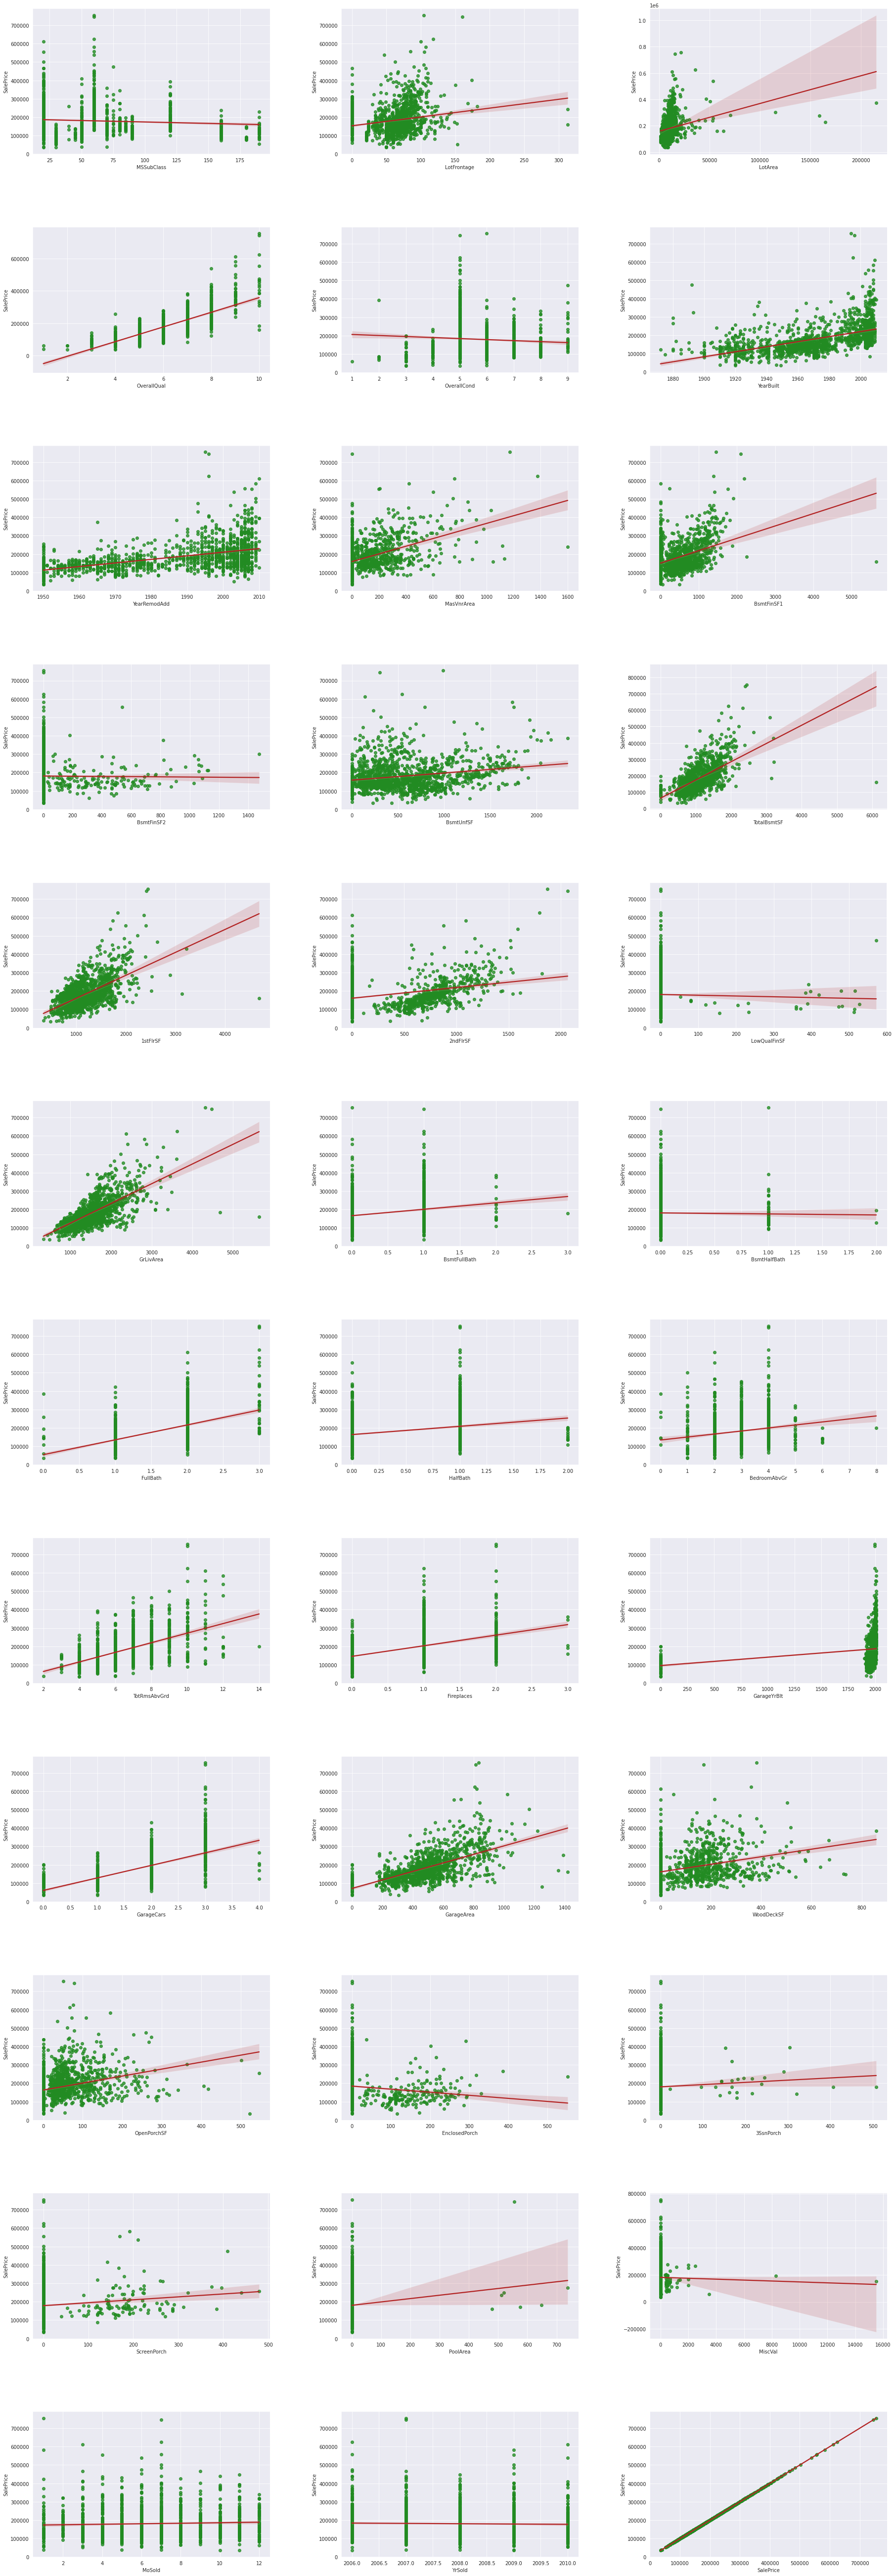

In [ ]:
fig = plt.figure(figsize=(30,50))
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=1.9,
                    wspace=0.3,
                    hspace=0.5)
for i, col in enumerate(df_train_num.columns):
        plt.subplot(15,3,i+1)
        sns.regplot(x=col, y= "SalePrice", data=df_train_num, scatter_kws={"color": "forestgreen"}, line_kws={"color": "firebrick"})

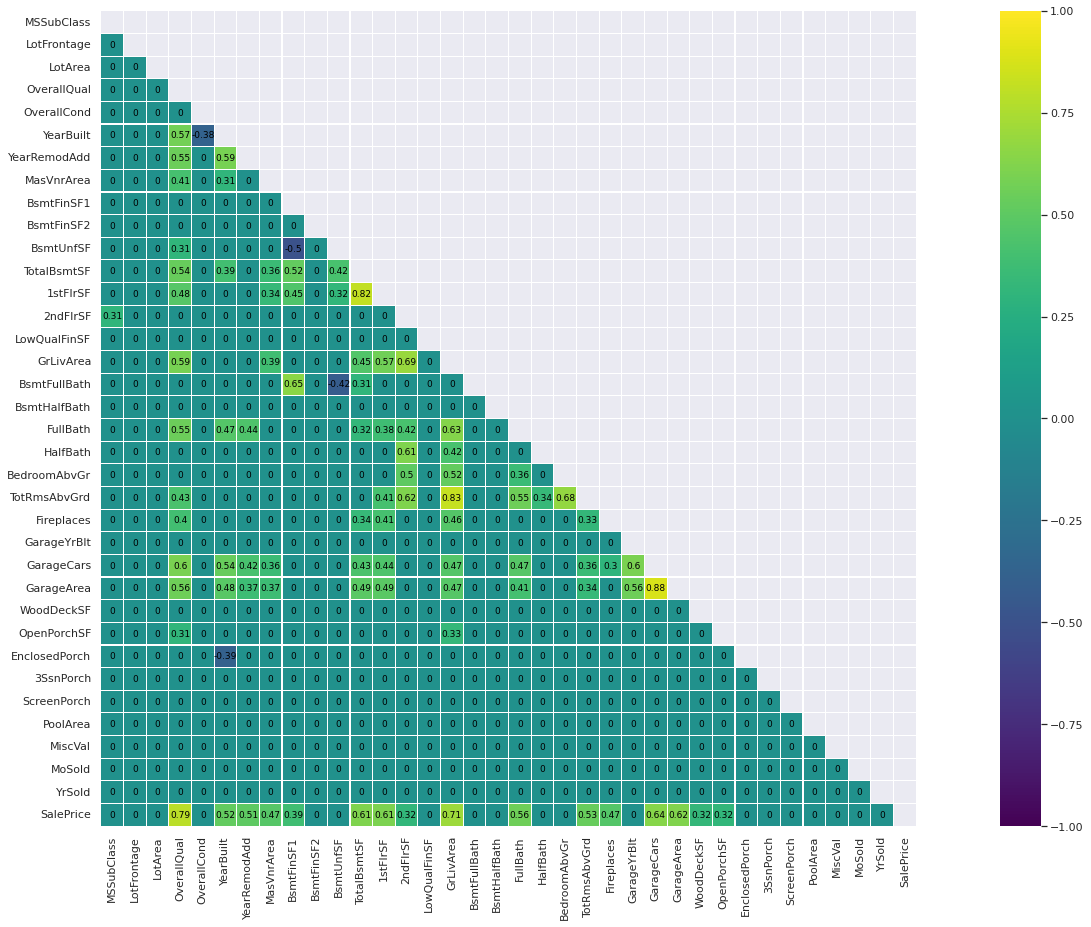

In [ ]:
# Heatmap for all the remaining numerical data including the taget 'SalePrice'

# Define the heatmap parameters
pd.options.display.float_format = "{:,.2f}".format

# Define correlation matrix 
# (method = pearson: standard correlation coefficient)
corr_matrix = df_train_num.corr(method = 'pearson')

# Replace correlation < |0.3| by 0 for a better visibility
corr_matrix[(corr_matrix < 0.3) & (corr_matrix > -0.3)] = 0

# Mask the upper part of the heatmap
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Choose the color map
cmap = "viridis"

# plot the heatmap
sns.set(rc = {'figure.figsize':(30,15)})
sns.heatmap(corr_matrix, mask=mask, vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot_kws={"size": 9, "color": "black"}, square=True, cmap=cmap, annot=True)

In [ ]:
df_num_corr = df_train_num.corr()["SalePrice"][:-1]

# Correlated features (r2 > 0.7)
strong_features_list = df_num_corr[abs(df_num_corr) >= 0.7].sort_values(ascending=False)
print(f"{len(strong_features_list)} strongly correlated values with SalePrice:\n{strong_features_list}\n")

# Correlated features (0.3 < r2 < 0.5)
moderate_features_list = df_num_corr[(abs(df_num_corr) < 0.7) & (abs(df_num_corr) >= 0.5)].sort_values(ascending=False)
print(f"{len(moderate_features_list)} moderately correlated values with SalePrice:\n{moderate_features_list}\n")


# Correlated features (0.3 < r2 < 0.5)
weak_features_list = df_num_corr[(abs(df_num_corr) < 0.5) & (abs(df_num_corr) >= 0.3)].sort_values(ascending=False)
print(f"{len(weak_features_list)} weakly correlated values with SalePrice:\n{weak_features_list}")

2 strongly correlated values with SalePrice:
OverallQual   0.79
GrLivArea     0.71
Name: SalePrice, dtype: float64

8 moderately correlated values with SalePrice:
GarageCars     0.64
GarageArea     0.62
TotalBsmtSF    0.61
1stFlrSF       0.61
FullBath       0.56
TotRmsAbvGrd   0.53
YearBuilt      0.52
YearRemodAdd   0.51
Name: SalePrice, dtype: float64

6 weakly correlated values with SalePrice:
MasVnrArea    0.47
Fireplaces    0.47
BsmtFinSF1    0.39
WoodDeckSF    0.32
2ndFlrSF      0.32
OpenPorchSF   0.32
Name: SalePrice, dtype: float64


In [ ]:
strong_features_list.head()

OverallQual   0.79
GrLivArea     0.71
Name: SalePrice, dtype: float64

In [ ]:
from sklearn import preprocessing
import xgboost as xgb
from xgboost.sklearn import XGBRegressor
import datetime
from sklearn.model_selection import GridSearchCV, train_test_split

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [ ]:
df_test = pd.read_csv('test.csv')
df_train = pd.read_csv('train.csv')

In [ ]:
X = df_train.drop(['Id', "SalePrice"], axis=1)
Y = df_train["SalePrice"]
x_test = df_test.drop(["Id"], axis=1)
for c in X.columns:
    if X[c].dtype == 'object':
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(X[c].values))
        X[c] = lbl.transform(list(X[c].values))

for c in x_test.columns:
    if x_test[c].dtype == 'object':
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(x_test[c].values))
        x_test[c] = lbl.transform(list(x_test[c].values))        


X, X_Val, Y, Y_Val = train_test_split(X, Y)


In [ ]:
params = {'min_child_weight':[1, 3, 5], 'gamma':[i/10.0 for i in range(3,6)],  'subsample':[i/10.0 for i in range(6,15)],
'colsample_bytree':[i/10.0 for i in range(6,15)], 'max_depth': [3,6,8,10], 'reg_alpha':[0.01, 0.5],
'reg_lambda':[0.01, 0.5], '‍learning_rate':[0.05]}

# Initialize XGB and GridSearch
xgb = XGBRegressor(nthread=-1) 

grid = GridSearchCV(xgb, params)
grid.fit(X, Y)

# Print the r2 score
print(r2_score(Y_Val, grid.best_estimator_.predict(X_Val))) 

Streaming output truncated to the last 5000 lines.
[08:55:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:55:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:55:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:55:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:55:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:55:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:55:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:55:17] WARNING: /workspace/src/objective/regression_obj.

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
40320 fits failed out of a total of 58320.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3600 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/xgboost/sklearn.py", line 396, in fit
    callbacks=callbacks)
  File "/usr/local/lib/python3.7/dist-packages/xgboost/training.py", line 216, in train
    xgb_model=xgb_model, callbacks=callbacks)
  File "/usr/local/lib/python3.7/dist-packages/xgboost/training.py

[08:56:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.898967743432517


In [ ]:
y_test = grid.best_estimator_.predict(x_test)

In [ ]:
sample_submission = pd.read_csv('sample_submission.csv')

In [ ]:
sample_submission.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


In [ ]:
sample_submission['SalePrice'] = y_test

In [ ]:
sample_submission.head()

,Id,SalePrice
0,1461,127969.945312
1,1462,150853.187500
2,1463,182664.656250
3,1464,187345.031250
4,1465,198122.031250


In [ ]:
sample_submission.to_csv("submission.csv", index=False)

In [ ]:
!kaggle competitions submit -c house-prices-advanced-regression-techniques -f submission.csv -m "Message"

100% 21.1k/21.1k [00:00<00:00, 118kB/s]
Successfully submitted to House Prices - Advanced Regression Techniques

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
test_df = pd.read_csv('test.csv')
train_df = pd.read_csv('train.csv')

In [ ]:
test_df.fillna(0, inplace= True)
train_df.fillna(0, inplace= True)

In [ ]:
X = train_df.drop(['Id', "SalePrice"], axis=1)
Y = train_df["SalePrice"]
x_test = test_df.drop(["Id"], axis=1)
for c in X.columns:
    if X[c].dtype == 'object':
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(X[c].values))
        X[c] = lbl.transform(list(X[c].values))

for c in x_test.columns:
    if x_test[c].dtype == 'object':
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(x_test[c].values))
        x_test[c] = lbl.transform(list(x_test[c].values))   

In [ ]:
X, X_Val, Y, Y_Val = train_test_split(X, Y, test_size=0.2)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 42)
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [ ]:
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X, Y)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [ ]:
rf_random.best_params_

{'bootstrap': False,
 'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 400}

In [ ]:
def evaluate(model, X_Val, Y_Val):
    predictions = model.predict(X_Val)
    errors = abs(predictions - Y_Val)
    mape = 100 * np.mean(errors / Y_Val)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy
base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_model.fit(X, Y)
base_accuracy = evaluate(base_model, X_Val, Y_Val)

Model Performance
Average Error: 20750.0161 degrees.
Accuracy = 88.11%.


In [ ]:
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, X_Val, Y_Val)

Model Performance
Average Error: 18082.2457 degrees.
Accuracy = 89.54%.


In [ ]:
print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

Improvement of 1.63%.


In [ ]:
predictions = rf_random.best_estimator_.predict(x_test)

In [24]:
sample_submission = pd.read_csv('sample_submission.csv')

In [25]:
sample_submission['SalePrice'] = predictions

In [26]:
sample_submission.to_csv("submission.csv", index=False)

In [27]:
!kaggle competitions submit -c house-prices-advanced-regression-techniques -f submission.csv -m "Message"

100% 23.0k/23.0k [00:00<00:00, 111kB/s]
Successfully submitted to House Prices - Advanced Regression Techniques

In [48]:
from sklearn.linear_model import LinearRegression

In [49]:
test_df = pd.read_csv('test.csv')
train_df = pd.read_csv('train.csv')

In [50]:
test_df.fillna(0, inplace= True)
train_df.fillna(0, inplace= True)

In [51]:
X = train_df.drop(['Id', "SalePrice"], axis=1)
Y = train_df["SalePrice"]
x_test = test_df.drop(["Id"], axis=1)
for c in X.columns:
    if X[c].dtype == 'object':
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(X[c].values))
        X[c] = lbl.transform(list(X[c].values))

for c in x_test.columns:
    if x_test[c].dtype == 'object':
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(x_test[c].values))
        x_test[c] = lbl.transform(list(x_test[c].values)) 

In [52]:
train_X, test_X, train_y, test_y = train_test_split(X, Y, test_size=0.25)

In [72]:
model = LinearRegression()

In [62]:
model = LinearRegression().fit(train_X, train_y)

In [65]:
r_sq = model.score(train_X, train_y)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.8714361980245011


In [66]:
print('intercept:', model.intercept_)

intercept: 1747397.277851574


In [67]:
print('slope:', model.coef_)

slope: [-1.05039864e+02 -5.26493901e+02 -6.32656451e+01  3.06807880e-01
  3.43495548e+04 -1.75137296e+03 -1.02826031e+02  2.03826790e+03
 -4.84019832e+04  3.04055403e+02  1.47616041e+04  5.20628990e+02
 -6.70265930e+02 -1.22439554e+04 -1.90446620e+03 -7.13527938e+02
  1.01134046e+04  6.56647944e+03  3.04481583e+02 -1.03675445e+01
 -2.70911104e+02  7.40144436e+03 -9.95368156e+02  3.28943106e+02
  1.03457954e+03  2.54685351e+01 -7.70223882e+03  1.40717580e+03
 -1.13272752e+03 -6.75629965e+03  1.91325809e+03 -2.47331657e+03
 -4.71924134e+02  5.61411148e+00  2.75367976e+03  1.40003321e+01
 -2.79798070e+00  1.68164625e+01 -4.61127101e+03 -1.41585441e+03
 -2.74456765e+03 -1.23814822e+03  1.77211588e+01  2.25249759e+01
 -2.18819032e+01  1.83642314e+01  6.28980756e+03  5.99913223e+02
  2.22262477e+03 -1.58893133e+02 -3.38881179e+03 -1.23785357e+04
 -8.29957811e+03  3.96226288e+03  3.70807519e+03  7.76913537e+03
 -1.19422005e+03  6.81954198e+02 -4.34010686e+00 -3.23230281e+03
  1.14687338e+04  

In [69]:
y_pred = model.predict(train_X)
print('predicted response:', y_pred, sep='\n')


predicted response:
[138191.46043026 146608.24977312 154091.90857431 ... 125362.88686386
 302409.05309895 121665.04561158]


In [73]:
model = LinearRegression().fit(X, Y)

In [75]:
r_sq = model.score(X, Y)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.8679563430812847


In [76]:
print('intercept:', model.intercept_)

intercept: 1293192.085908448


In [77]:
print('slope:', model.coef_)

slope: [-6.56840807e+01 -1.76624650e+03 -2.31172620e+01  3.88664621e-01
  3.49139521e+04 -2.23661601e+03 -6.50666942e+02  1.99471865e+03
 -4.62214189e+04  1.71450953e+02  4.63784896e+03  3.88198516e+02
 -5.74893106e+02 -9.57627480e+03 -2.44171359e+03 -6.90579270e+02
  1.04377116e+04  5.79607242e+03  2.19519787e+02  1.56067624e+01
  1.02915375e+03  4.59832660e+03 -1.10558184e+03  6.21532214e+02
  3.70165484e+03  3.10745752e+01 -9.92575973e+03  8.17518774e+02
  7.39049628e+00 -7.12834635e+03  2.15785292e+03 -2.84360487e+03
 -3.12054631e+02  7.77590900e+00  2.33993056e+03  1.26936855e+01
 -2.50793049e+00  1.79616645e+01 -2.29287120e+03 -5.44634014e+02
  5.53896134e+02 -6.17778010e+02  2.10512123e+01  2.50654427e+01
 -2.83203806e+01  1.77962746e+01  5.70592255e+03 -7.92728768e+02
  2.24008862e+03 -2.44791978e+01 -4.66561284e+03 -1.92218700e+04
 -7.23194663e+03  4.49421974e+03  3.52350633e+03  8.29497874e+03
 -1.37343288e+03  6.97014338e+02 -7.78612183e+00 -1.51305782e+03
  1.03625538e+04  

In [78]:
pred = model.predict(x_test)
print('predicted response:', pred, sep='\n')

predicted response:
[ 61820.66024528 111844.27786997 117417.37952803 ... 107415.05059054
  74219.18946968 191663.76310787]


In [79]:
sample_submission = pd.read_csv('sample_submission.csv')

In [80]:
sample_submission['SalePrice'] = pred

In [81]:
sample_submission.to_csv("submission.csv", index=False)

In [82]:
!kaggle competitions submit -c house-prices-advanced-regression-techniques -f submission.csv -m "Message"

100% 33.4k/33.4k [00:00<00:00, 159kB/s]
Successfully submitted to House Prices - Advanced Regression Techniques